In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

In [2]:
matches = pd.read_csv(r"Matches.csv")
cups = pd.read_csv(r"cups.csv")
raw = pd.read_csv(r"RawFullData.csv")
FullData = pd.read_csv(r"FullData.csv")
Train1 = pd.read_csv(r"Train.csv")
Train2 = pd.read_csv(r"Train.csv")
Test = pd.read_csv(r"Test.csv")
MatchesTrain = pd.read_csv(r"MatchesTrain.csv")
MatchesTest = pd.read_csv(r"MatchesTest.csv")

In [3]:
FullData = FullData.set_index('Year')
Train1 = Train1.set_index('Year')
Train2 = Train2.set_index('Year')
Test = Test.set_index('Year')
del MatchesTrain['Year']
del MatchesTrain['Unnamed: 0']
del MatchesTest['Year']
del MatchesTest['Unnamed: 0']

In [4]:
Static = raw
del Static['Year']
Static=Static.groupby('Country').agg({'Matches': ['sum']})
Static.columns = ['MatchesSum']
cupsStatic = cups.groupby(['Champion']).agg({'Host': ['size'],})
cupsStatic.columns = ['ChampionTimes']
Static = pd.concat([Static, cupsStatic], axis=1)
Static.ChampionTimes = Static.ChampionTimes.fillna(0)
Static.sort_values(by='MatchesSum',ascending=False)

,MatchesSum,ChampionTimes
Germany,49.0,3.0
Spain,40.0,3.0
France,39.0,2.0
Italy,38.0,1.0
Netherlands,35.0,1.0
Portugal,35.0,1.0
England,31.0,0.0
Russia,30.0,1.0
Denmark,27.0,1.0
Czech Republic,24.0,0.0


In [5]:
plot1 = FullData.loc[FullData.Champion == True]
plot1 = plot1.groupby('Matches').agg({'Champion': ['size']})
plot1.columns = ['Champ']
plot1 = plot1.reset_index(level=['Matches'])
plot2 = FullData.loc[FullData.Champion ==  False]
plot2 = plot2.groupby('Matches').agg({'Champion': ['size']})
plot2.columns = ['NonChamp']
plot2 = plot2.reset_index(level=['Matches'])
plot = pd.merge(plot1, plot2, how="outer", on=["Matches"])
plot['Champ'] =plot['Champ']/(plot['Champ'] + plot['NonChamp'])
plot['NonChamp'] = 1 - plot['Champ']
plot

,Matches,Champ,NonChamp
0,high,0.428571,0.571429
1,low,0.222222,0.777778
2,mid,0.040323,0.959677


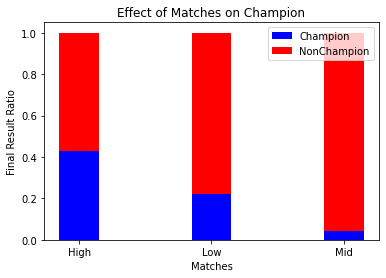

In [6]:
Matches = ["High", "Low", "Mid"]
width = 0.3
plt.bar(plot.index, plot.Champ.to_numpy(), width, color = "blue", label="Champion")
plt.bar(plot.index, plot.NonChamp.to_numpy(), width, color = "red", label="NonChampion", bottom = plot.Champ.to_numpy())
plt.title("Effect of Matches on Champion")
plt.xlabel("Matches")
plt.ylabel("Final Result Ratio")
plt.xticks(plot.index, Matches)
plt.legend(loc='best')
plt.show()

In [7]:
plot1 = FullData.loc[FullData.Champion ==  True]
plot1 = plot1.groupby('AveGoalsFor').agg({'Champion': ['size']})
plot1.columns = ['Champ']
plot1 = plot1.reset_index(level=['AveGoalsFor'])
plot2 = FullData.loc[FullData.Champion ==  False]
plot2 = plot2.groupby('AveGoalsFor').agg({'Champion': ['size']})
plot2.columns = ['NonChamp']
plot2 = plot2.reset_index(level=['AveGoalsFor'])
plot = pd.merge(plot1, plot2, how="outer", on=["AveGoalsFor"])
plot['Champ'] =plot['Champ']/(plot['Champ'] + plot['NonChamp'])
plot['NonChamp'] = 1 - plot['Champ']
plot

,AveGoalsFor,Champ,NonChamp
0,high,0.250000,0.750000
1,low,0.012346,0.987654
2,mid,0.183099,0.816901


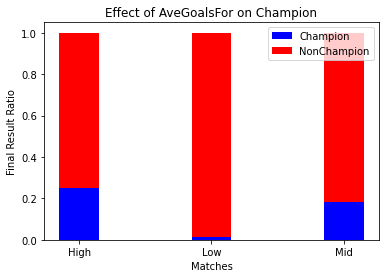

In [8]:
AveGoalsFor = ["High", "Low", "Mid"]
width = 0.3
plt.bar(plot.index, plot.Champ.to_numpy(), width, color = "blue", label="Champion")
plt.bar(plot.index, plot.NonChamp.to_numpy(), width, color = "red", label="NonChampion", bottom = plot.Champ.to_numpy())
plt.title("Effect of AveGoalsFor on Champion")
plt.xlabel("Matches")
plt.ylabel("Final Result Ratio")
plt.xticks(plot.index, AveGoalsFor)
plt.legend(loc='best')
plt.show()

In [9]:
plot1 = FullData.loc[FullData.Champion == True]
plot1 = plot1.groupby('ChampCount').agg({'Champion': ['size']})
plot1.columns = ['Champ']
plot1 = plot1.reset_index(level=['ChampCount'])
plot2 = FullData.loc[FullData.Champion ==  False]
plot2 = plot2.groupby('ChampCount').agg({'Champion': ['size']})
plot2.columns = ['NonChamp']
plot2 = plot2.reset_index(level=['ChampCount'])
plot = pd.merge(plot1, plot2, how="outer", on=["ChampCount"])
plot['Champ'] =plot['Champ']/(plot['Champ'] + plot['NonChamp'])
plot['NonChamp'] = 1 - plot['Champ']
plot

,ChampCount,Champ,NonChamp
0,0.0,0.009901,0.990099
1,1.0,0.209302,0.790698
2,2.0,0.500000,0.500000
3,3.0,0.333333,0.666667


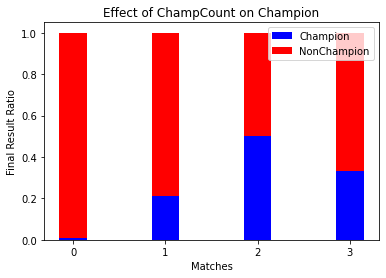

In [10]:
ChampCount = ["0", "1", "2", "3"]
width = 0.3
plt.bar(plot.index, plot.Champ.to_numpy(), width, color = "blue", label="Champion")
plt.bar(plot.index, plot.NonChamp.to_numpy(), width, color = "red", label="NonChampion", bottom = plot.Champ.to_numpy())
plt.title("Effect of ChampCount on Champion")
plt.xlabel("Matches")
plt.ylabel("Final Result Ratio")
plt.xticks(plot.index, ChampCount)
plt.legend(loc='best')
plt.show()

In [11]:
plot1 = FullData.loc[FullData.Champion ==  True]
plot1 = plot1.groupby('Host').agg({'Champion': ['size']})
plot1.columns = ['Champ']
plot1 = plot1.reset_index(level=['Host'])
plot2 = FullData.loc[FullData.Champion ==  False]
plot2 = plot2.groupby('Host').agg({'Champion': ['size']})
plot2.columns = ['NonChamp']
plot2 = plot2.reset_index(level=['Host'])
plot = pd.merge(plot1, plot2, how="outer", on=["Host"])
plot['Champ'] =plot['Champ']/(plot['Champ'] + plot['NonChamp'])
plot['NonChamp'] = 1 - plot['Champ']
plot

,Host,Champ,NonChamp
0,False,0.086957,0.913043
1,True,0.166667,0.833333


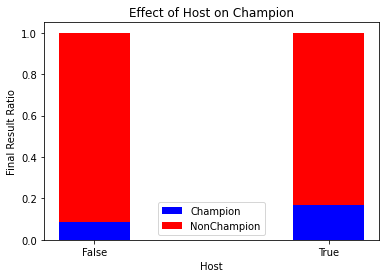

In [12]:
Host = ["False", "True"]
width = 0.3
plt.bar(plot.index, plot.Champ.to_numpy(), width, color = "blue", label="Champion")
plt.bar(plot.index, plot.NonChamp.to_numpy(), width, color = "red", label="NonChampion", bottom = plot.Champ.to_numpy())
plt.title("Effect of Host on Champion")
plt.xlabel("Host")
plt.ylabel("Final Result Ratio")
plt.xticks(plot.index, Host)
plt.legend(loc='best')
plt.show()

In [13]:
del Train1['HomeMatches']
del Train1['HomeAveGoalsFor']
del Train1['HomeAveGoalsAgainst']
del Train1['AwayMatches']
del Train1['AwayAveGoalsFor']
del Train1['AwayAveGoalsAgainst']
del Train1['AveGoalsAgainst']
Train1

,Country,Matches,AveGoalsFor,Host,ChampCount,Champion
Year,,,,,,
1960,Czechoslovakia,low,low,False,0.0,False
1960,France,low,mid,True,0.0,False
1960,Russia,low,mid,False,0.0,True
1960,Yugoslavia,low,high,False,0.0,False
1968,England,low,low,False,0.0,False
...,...,...,...,...,...,...
2016,Sweden,mid,low,False,0.0,False
2016,Switzerland,mid,low,False,0.0,False
2016,Turkey,mid,low,False,0.0,False


In [14]:
model = BayesianModel([('Country', 'AveGoalsFor'), ('Country', 'ChampCount'), ('AveGoalsFor', 'Champion'), ('Host', 'Champion'), ('ChampCount', 'Champion'), ('Matches', 'Champion')])

In [15]:
model.fit(Train1, estimator = MaximumLikelihoodEstimator)
model.check_model()

True

In [16]:
print(model.get_cpds('Matches'))

+---------------+-----------+
| Matches(high) | 0.0909091 |
+---------------+-----------+
| Matches(low)  | 0.0757576 |
+---------------+-----------+
| Matches(mid)  | 0.833333  |
+---------------+-----------+


In [17]:
print(model.get_cpds('Host'))

+-------------+----------+
| Host(False) | 0.893939 |
+-------------+----------+
| Host(True)  | 0.106061 |
+-------------+----------+


In [18]:
print(model.get_cpds('Country'))

+------------------------------+------------+
| Country(Albania)             | 0.00757576 |
+------------------------------+------------+
| Country(Austria)             | 0.0151515  |
+------------------------------+------------+
| Country(Belgium)             | 0.030303   |
+------------------------------+------------+
| Country(Bulgaria)            | 0.0151515  |
+------------------------------+------------+
| Country(CIS)                 | 0.00757576 |
+------------------------------+------------+
| Country(Croatia)             | 0.030303   |
+------------------------------+------------+
| Country(Czech Republic)      | 0.0378788  |
+------------------------------+------------+
| Country(Czechoslovakia)      | 0.0227273  |
+------------------------------+------------+
| Country(Denmark)             | 0.0454545  |
+------------------------------+------------+
| Country(England)             | 0.0606061  |
+------------------------------+------------+
| Country(FR Yugoslavia)       | 0

In [19]:
print(model.get_cpds('AveGoalsFor'))

+-------------------+------------------+------------------+------------------+-------------------+--------------+------------------+-------------------------+-------------------------+------------------+------------------+------------------------+-----------------+------------------+--------------------+------------------+------------------+----------------+-----------------+----------------------+---------------------------+-----------------+-----------------+---------------------+------------------------------+------------------+---------------------+-------------------+-------------------+-------------------+----------------+-----------------+----------------------+-----------------+------------------+----------------+---------------------+
| Country           | Country(Albania) | Country(Austria) | Country(Belgium) | Country(Bulgaria) | Country(CIS) | Country(Croatia) | Country(Czech Republic) | Country(Czechoslovakia) | Country(Denmark) | Country(England) | Country(FR Yugoslavia) 

In [20]:
print(model.get_cpds('ChampCount'))

+-----------------+------------------+------------------+------------------+-------------------+--------------+------------------+-------------------------+-------------------------+--------------------+------------------+------------------------+-----------------+------------------+--------------------+------------------+------------------+----------------+-----------------+----------------------+---------------------------+-----------------+-----------------+---------------------+------------------------------+------------------+-----------------+-------------------+-------------------+-------------------+----------------+-----------------+----------------------+-----------------+------------------+----------------+---------------------+
| Country         | Country(Albania) | Country(Austria) | Country(Belgium) | Country(Bulgaria) | Country(CIS) | Country(Croatia) | Country(Czech Republic) | Country(Czechoslovakia) | Country(Denmark)   | Country(England) | Country(FR Yugoslavia) | Co

In [21]:
print(model.get_cpds('Champion'))

+-----------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------

In [22]:
infer = VariableElimination(model)

In [23]:
Country = 'Albania'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Albania


Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 93.08it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9505 |
+-----------------+-----------------+
| Champion(True)  |          0.0495 |
+-----------------+-----------------+


In [24]:
Country = 'Austria'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Austria







Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 90.96it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9505 |
+-----------------+-----------------+
| Champion(True)  |          0.0495 |
+-----------------+-----------------+


In [25]:
Country = 'Belgium'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00,  8.46it/s]


Belgium


Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 93.06it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9583 |
+-----------------+-----------------+
| Champion(True)  |          0.0417 |
+-----------------+-----------------+


In [26]:
Country = 'Bulgaria'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Bulgaria







Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 90.96it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9505 |
+-----------------+-----------------+
| Champion(True)  |          0.0495 |
+-----------------+-----------------+


In [27]:
Country = 'CIS'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

CIS














Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 108.17it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9505 |
+-----------------+-----------------+
| Champion(True)  |          0.0495 |
+-----------------+-----------------+


In [28]:
Country = 'Croatia'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Croatia





















Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 50.03it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9661 |
+-----------------+-----------------+
| Champion(True)  |          0.0339 |
+-----------------+-----------------+


In [29]:
Country = 'Czech Republic'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00,  7.19it/s]


Czech Republic


Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 66.66it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9599 |
+-----------------+-----------------+
| Champion(True)  |          0.0401 |
+-----------------+-----------------+


In [30]:
Country = 'Czechoslovakia'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Czechoslovakia







Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 90.96it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.8199 |
+-----------------+-----------------+
| Champion(True)  |          0.1801 |
+-----------------+-----------------+


In [31]:
Country = 'Denmark'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Denmark














Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 81.68it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.8395 |
+-----------------+-----------------+
| Champion(True)  |          0.1605 |
+-----------------+-----------------+


In [32]:
Country = 'England'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

England





















Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 102.62it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9564 |
+-----------------+-----------------+
| Champion(True)  |          0.0436 |
+-----------------+-----------------+


In [33]:
Country = 'FR Yugoslavia'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00,  9.42it/s]


FR Yugoslavia


Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 72.77it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9661 |
+-----------------+-----------------+
| Champion(True)  |          0.0339 |
+-----------------+-----------------+


In [34]:
Country = 'France'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

France







Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 121.28it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.8173 |
+-----------------+-----------------+
| Champion(True)  |          0.1827 |
+-----------------+-----------------+


In [35]:
Country = 'Germany'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Germany














Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 142.94it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.7322 |
+-----------------+-----------------+
| Champion(True)  |          0.2678 |
+-----------------+-----------------+


In [36]:
Country = 'Greece'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Greece





















Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 59.73it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9235 |
+-----------------+-----------------+
| Champion(True)  |          0.0765 |
+-----------------+-----------------+


In [37]:
Country = 'Hungary'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 10.13it/s]


Hungary


Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 102.62it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9661 |
+-----------------+-----------------+
| Champion(True)  |          0.0339 |
+-----------------+-----------------+


In [38]:
Country = 'Iceland'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Iceland







Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 153.93it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9661 |
+-----------------+-----------------+
| Champion(True)  |          0.0339 |
+-----------------+-----------------+


In [39]:
Country = 'Italy'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Italy














Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 111.17it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.8263 |
+-----------------+-----------------+
| Champion(True)  |          0.1737 |
+-----------------+-----------------+


In [40]:
Country = 'Latvia'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Latvia





















Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 65.62it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9505 |
+-----------------+-----------------+
| Champion(True)  |          0.0495 |
+-----------------+-----------------+


In [41]:
Country = 'Netherlands'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00,  8.29it/s]


Netherlands


Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 100.06it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.7504 |
+-----------------+-----------------+
| Champion(True)  |          0.2496 |
+-----------------+-----------------+


In [42]:
Country = 'Northern Ireland'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Northern Ireland







Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 97.62it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9505 |
+-----------------+-----------------+
| Champion(True)  |          0.0495 |
+-----------------+-----------------+


In [43]:
Country = 'Norway'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Norway














Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 75.51it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9505 |
+-----------------+-----------------+
| Champion(True)  |          0.0495 |
+-----------------+-----------------+


In [44]:
Country = 'Poland'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Poland





















Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 80.05it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9505 |
+-----------------+-----------------+
| Champion(True)  |          0.0495 |
+-----------------+-----------------+


In [45]:
Country = 'Portugal'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00,  6.79it/s]


Portugal


Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 93.07it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9434 |
+-----------------+-----------------+
| Champion(True)  |          0.0566 |
+-----------------+-----------------+


In [46]:
Country = 'Republic of Ireland'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Republic of Ireland







Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 74.12it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9505 |
+-----------------+-----------------+
| Champion(True)  |          0.0495 |
+-----------------+-----------------+


In [47]:
Country = 'Romania'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Romania














Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 125.07it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9505 |
+-----------------+-----------------+
| Champion(True)  |          0.0495 |
+-----------------+-----------------+


In [48]:
Country = 'Russia'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Russia





















Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 142.94it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9594 |
+-----------------+-----------------+
| Champion(True)  |          0.0406 |
+-----------------+-----------------+


In [49]:
Country = 'Scotland'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 10.39it/s]


Scotland


Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 88.94it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9505 |
+-----------------+-----------------+
| Champion(True)  |          0.0495 |
+-----------------+-----------------+


In [50]:
Country = 'Slovakia'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Slovakia







Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 85.16it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9505 |
+-----------------+-----------------+
| Champion(True)  |          0.0495 |
+-----------------+-----------------+


In [51]:
Country = 'Slovenia'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Slovenia














Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 125.07it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9661 |
+-----------------+-----------------+
| Champion(True)  |          0.0339 |
+-----------------+-----------------+


In [52]:
Country = 'Spain'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Spain





















Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 108.16it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.8100 |
+-----------------+-----------------+
| Champion(True)  |          0.1900 |
+-----------------+-----------------+


In [53]:
Country = 'Sweden'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00,  9.18it/s]


Sweden


Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 110.56it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9568 |
+-----------------+-----------------+
| Champion(True)  |          0.0432 |
+-----------------+-----------------+


In [54]:
Country = 'Switzerland'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Switzerland







Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 80.05it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9505 |
+-----------------+-----------------+
| Champion(True)  |          0.0495 |
+-----------------+-----------------+


In [55]:
Country = 'Turkey'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Turkey














Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 80.05it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9544 |
+-----------------+-----------------+
| Champion(True)  |          0.0456 |
+-----------------+-----------------+


In [56]:
Country = 'Ukraine'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Ukraine





















Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 100.04it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9505 |
+-----------------+-----------------+
| Champion(True)  |          0.0495 |
+-----------------+-----------------+


In [57]:
Country = 'Wales'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 10.16it/s]


Wales


Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 153.92it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.9661 |
+-----------------+-----------------+
| Champion(True)  |          0.0339 |
+-----------------+-----------------+


In [58]:
Country = 'Yugoslavia'
print(Country)
print(infer.query(variables = ['Champion'], evidence = {'Country': Country}))

Yugoslavia







Eliminating: Matches: 100%|██████████| 4/4 [00:00<00:00, 93.07it/s]

+-----------------+-----------------+
| Champion        |   phi(Champion) |
+=================+=================+
| Champion(False) |          0.8503 |
+-----------------+-----------------+
| Champion(True)  |          0.1497 |
+-----------------+-----------------+


In [59]:
Test1 = Test
del Test1['HomeMatches']
del Test1['HomeAveGoalsFor']
del Test1['HomeAveGoalsAgainst']
del Test1['AwayMatches']
del Test1['AwayAveGoalsFor']
del Test1['AwayAveGoalsAgainst']
del Test1['Champion']
del Test1['AveGoalsAgainst']
del Test1['AveGoalsFor']
Test1

,Country,Matches,Host,ChampCount
Year,,,,
1964,Denmark,low,False,0.0
1964,Hungary,low,False,0.0
1964,Russia,low,False,0.0
1964,Spain,low,True,1.0
1972,Belgium,low,True,0.0
1972,Germany,low,False,1.0
1972,Hungary,low,False,0.0
1972,Russia,low,False,0.0
2012,Croatia,mid,False,0.0


In [60]:
y = Test1.index.values
y = np.unique(y)
for i in y:
    print(model.predict(Test1.loc[i]))


100%|██████████| 4/4 [00:00<00:00, 57.18it/s]


   Champion AveGoalsFor
0     False         low
1     False         mid
2     False         low
3     False         low


100%|██████████| 4/4 [00:00<00:00, 800.40it/s]


   Champion AveGoalsFor
0     False         mid
1      True         mid
2     False         mid
3     False         low


100%|██████████| 16/16 [00:00<00:00, 89.94it/s]


    Champion AveGoalsFor
0      False         mid
1      False         mid
2      False         low
3      False         low
4      False         mid
5      False         mid
6      False         low
7      False         low
8      False         mid
9      False         low
10     False         mid
11     False         low
12     False         mid
13      True         mid
14     False         low
15     False         low


In [61]:
del Train2['HomeMatches']
del Train2['HomeAveGoalsFor']
del Train2['HomeAveGoalsAgainst']
del Train2['AwayMatches']
del Train2['AwayAveGoalsFor']
del Train2['AwayAveGoalsAgainst']
Train2

,Country,Matches,AveGoalsFor,AveGoalsAgainst,Host,ChampCount,Champion
Year,,,,,,,
1960,Czechoslovakia,low,low,mid,False,0.0,False
1960,France,low,mid,high,True,0.0,False
1960,Russia,low,mid,low,False,0.0,True
1960,Yugoslavia,low,high,high,False,0.0,False
1968,England,low,low,low,False,0.0,False
...,...,...,...,...,...,...,...
2016,Sweden,mid,low,low,False,0.0,False
2016,Switzerland,mid,low,low,False,0.0,False
2016,Turkey,mid,low,mid,False,0.0,False


In [62]:
model1 = BayesianModel([('Country', 'AveGoalsFor'), ('Country', 'ChampCount'), ('AveGoalsFor', 'Champion'), ('Host', 'Champion'), ('ChampCount', 'Champion'), ('Matches', 'Champion'),('Country', 'AveGoalsAgainst')])
model1.fit(Train2, estimator = MaximumLikelihoodEstimator)
model1.check_model()

True

In [63]:
y = Test1.index.values
y = np.unique(y)
for i in y:
    print(model1.predict(Test1.loc[i]))

100%|██████████| 4/4 [00:00<00:00, 444.65it/s]


   Champion AveGoalsFor AveGoalsAgainst
0     False         low             mid
1     False         mid             mid
2     False         low             low
3     False         low             low


100%|██████████| 4/4 [00:00<00:00, 800.40it/s]

   Champion AveGoalsFor AveGoalsAgainst
0     False         mid             low
1      True         mid             low
2     False         mid             mid
3     False         low             low

100%|██████████| 16/16 [00:00<00:00, 82.10it/s]


    Champion AveGoalsFor AveGoalsAgainst
0      False         mid             low
1      False         mid             mid
2      False         low             mid
3      False         low             low
4      False         mid             low
5      False         mid             low
6      False         low             mid
7      False         low             low
8      False         mid             low
9      False         low             low
10     False         mid             low
11     False         low             low
12     False         mid             low
13      True         mid             low
14     False         low             mid
15     False         low             mid


In [67]:
MatchesTrain

,HomeTeamName,AwayTeamName,HomeTeamGoals,AwayTeamGoals,HomeWin
0,Ukraine,Northern Ireland,0,2,False
1,Portugal,Austria,0,0,False
2,Switzerland,Czech Republic,0,1,False
3,Italy,Romania,2,0,True
4,Germany,Portugal,0,0,False
...,...,...,...,...,...
224,France,Netherlands,0,0,True
225,Portugal,Germany,2,3,False
226,England,Switzerland,3,0,True
227,Czech Republic,Latvia,2,1,True


In [68]:
model2 = BayesianModel([('HomeTeamName', 'HomeTeamGoals'),('HomeTeamName', 'AwayTeamGoals'),('AwayTeamName', 'HomeTeamGoals'), ('AwayTeamName', 'AwayTeamGoals'), ('HomeTeamGoals', 'HomeWin'),('AwayTeamGoals', 'HomeWin')])
model2.fit(MatchesTrain, estimator = MaximumLikelihoodEstimator)
model2.check_model()

True

In [82]:
def Winner(model, Home, Away, threshold):
    d = {'HomeTeamName': [Home], 'AwayTeamName': [Away]}
    df = pd.DataFrame(data=d)
    data = model.predict_probability(df)
    if data.iloc[0]['HomeWin_True'] >= threshold:
        print(Home)
    else:
        print(Away)

In [85]:
Winner(model2, 'Spain', 'Germany', 0.3)

Spain
